In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
"""
    Drops NaN values from target dataframe.
"""
def dropNaNs(df):
    df = df.dropna()
    print("Dropped NaN values.")
    return df

In [ ]:
"""
    Checks for NaN values and calls dropNaNs to remove these values from the dataframes.
"""
def cleanNaNs(df1, df2):
    df1_check = df1.isnull().values.any()
    df2_check = df2.isnull().values.any()

    if df1_check:
        df1 = dropNaNs(df1)

    if df2_check:
        df2 = dropNaNs(df2)

    print("Dataset cleaned.")
    return df1, df2

In [ ]:
"""
    Checks for any NaN values left.
"""
def checkForNaNs(df1, df2):
    df1_check = df1.isnull().values.any()
    df2_check = df2.isnull().values.any()

    print(f"EmoSounds: {df1_check}")
    print(f"IADSED: {df2_check}")

In [ ]:
"""
    Converts all invalid or unparseable data to NaN values.
"""
def force_numeric(df, df_target):
    for c in df_target:
        df[c] = pd.to_numeric(df[c], errors="coerce")
    return df

In [7]:
# Load datasets
emo_df = pd.read_csv('data/original/EmoSounds-3.csv')
iad_df = pd.read_csv('data/original/IADSED-2.csv')

# Specify target variables before checking for NaNs
targets = ["arousal", "valence"]

# Force numeric values for target variables before checking for NaNs to ensure that any non-numeric values are converted to NaN and can be handled properly
emo_df = force_numeric(emo_df, targets)
iad_df = force_numeric(iad_df, targets)

# Clean NaNs (drops rows with non-numeric targets)
emo_df, iad_df = cleanNaNs(emo_df, iad_df)

# Check for any remaining NaNs
checkForNaNs(emo_df, iad_df)

Dropped NaN values.
Dataset cleaned.
EmoSounds: False
IADSED: False


Creating Visualizations...
Visualization saved as 'emotion_visualization.png'


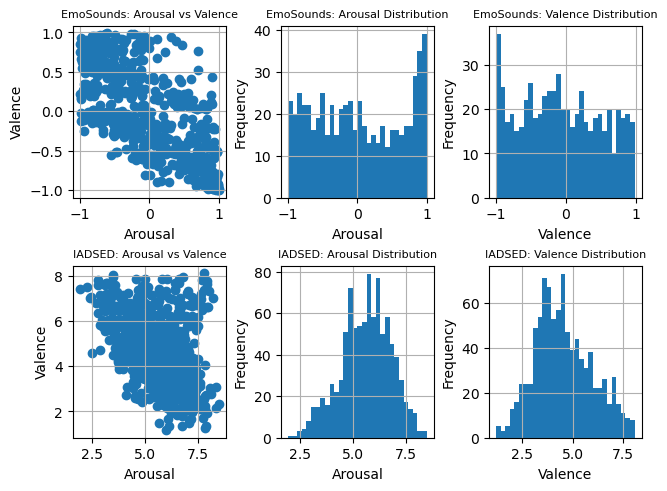

In [8]:
print("Creating Visualizations...")

fig, axes = plt.subplots(2, 3, constrained_layout=True)

# EmoSounds visualizations
axes[0, 0].scatter(emo_df['arousal'], emo_df['valence'])
axes[0, 0].set_xlabel('Arousal')
axes[0, 0].set_ylabel('Valence')
axes[0, 0].set_title('EmoSounds: Arousal vs Valence', fontsize=8)
axes[0, 0].grid(True)

axes[0, 1].hist(emo_df['arousal'], bins=30)
axes[0, 1].set_xlabel('Arousal')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('EmoSounds: Arousal Distribution', fontsize=8)
axes[0, 1].grid(True)

axes[0, 2].hist(emo_df['valence'], bins=30)
axes[0, 2].set_xlabel('Valence')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('EmoSounds: Valence Distribution', fontsize=8)
axes[0, 2].grid(True)

# IADSED visualizations
axes[1, 0].scatter(iad_df['arousal'], iad_df['valence'])
axes[1, 0].set_xlabel('Arousal')
axes[1, 0].set_ylabel('Valence')
axes[1, 0].set_title('IADSED: Arousal vs Valence', fontsize=8)
axes[1, 0].grid(True)

axes[1, 1].hist(iad_df['arousal'], bins=30)
axes[1, 1].set_xlabel('Arousal')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('IADSED: Arousal Distribution', fontsize=8)
axes[1, 1].grid(True)

axes[1, 2].hist(iad_df['valence'], bins=30)
axes[1, 2].set_xlabel('Valence')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('IADSED: Valence Distribution', fontsize=8)
axes[1, 2].grid(True)

plt.savefig('emotion_visualization.png')
print("Visualization saved as 'emotion_visualization.png'")

In [9]:
# Print insights
print("\nInsights:")
print(f"EmoSounds - Arousal mean: {emo_df['arousal'].mean():.3f}, std: {emo_df['arousal'].std():.3f}")
print(f"EmoSounds - Valence mean: {emo_df['valence'].mean():.3f}, std: {emo_df['valence'].std():.3f}")
print(f"IADSED - Arousal mean: {iad_df['arousal'].mean():.3f}, std: {iad_df['arousal'].std():.3f}")
print(f"IADSED - Valence mean: {iad_df['valence'].mean():.3f}, std: {iad_df['valence'].std():.3f}")


Insights:
EmoSounds - Arousal mean: 0.020, std: 0.622
EmoSounds - Valence mean: -0.067, std: 0.575
IADSED - Arousal mean: 5.587, std: 1.175
IADSED - Valence mean: 4.547, std: 1.422


In [ ]:
"""
  Normalizes all numeric features, such that the data distribution will have a mean of 0 and standard deviation of 1.
"""
def scale_numeric(df, feature_cols):
  df_preprocessed = df.copy()
  scaler = StandardScaler()
  df_preprocessed[feature_cols] = scaler.fit_transform(df[feature_cols])

  print(f"Normalized {len(feature_cols)} acoustic features")

  return df_preprocessed

In [11]:
# Preprocessing with StandardScaler
print("\nPreprocessing Datasets...")

# EmoSounds preprocessing
non_feature_cols_emo = ['dataset', 'fnames', 'genre', 'splits', 'vocals', 'arousal', 'valence']
feature_cols_emo = [col for col in emo_df.select_dtypes(include=['number']).columns
                    if col not in non_feature_cols_emo]

emo_preprocessed = scale_numeric(emo_df, feature_cols_emo)

# IADSED preprocessing
non_feature_cols_iad = ['source', 'description', 'category', 'fname', 'BE_Classification',
                        'arousal', 'valence']
feature_cols_iad = [col for col in iad_df.select_dtypes(include=['number']).columns
                    if col not in non_feature_cols_iad]

iad_preprocessed = scale_numeric(iad_df, feature_cols_iad)


Preprocessing Datasets...
Normalized 68 acoustic features
Normalized 69 acoustic features


In [13]:
"""
  One-Hot encodes all nominal categorical features and label encodes all ordinal
  categorical features.
  Also removes any unwanted cols. (ie: text features like description or name)
"""
def encode_remove_cols(df,cat_cols,label_cols, remove_cols):
  df = pd.get_dummies(
      df,
      columns=cat_cols,
      drop_first=True
  )

  for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

  df = df.drop(columns=remove_cols)

  return df

In [14]:
emo_cat_cols = ["genre"]
emo_label_cols = ["dataset", "splits", "vocals"]
emo_remove_cols = ["fnames"]
iad_cat_cols = ["category", "BE_Classification"]
iad_label_cols = ["source"]
iad_remove_cols = ["description", "fname"]

In [15]:
emo_preprocessed = encode_remove_cols(emo_preprocessed, emo_cat_cols, emo_label_cols, emo_remove_cols)
iad_preprocessed = encode_remove_cols(iad_preprocessed, iad_cat_cols, iad_label_cols, iad_remove_cols)

In [ ]:
"""
  Helper function to save datasets to csv files.
"""
def save_csv(df, output_dir, filename):

  if not os.path.exists(output_dir):
      os.makedirs(output_dir)

  full_path = output_dir + filename

  df.to_csv(full_path, index=False)
  print(f"{filename} saved.")

In [ ]:
# Save preprocessed datasets to csv.
save_csv(emo_preprocessed, 'data/preprocessed/', 'EmoSounds_preprocessed.csv')
save_csv(iad_preprocessed, 'data/preprocessed/', 'IADSED_preprocessed.csv')

EmoSounds_preprocessed.csv saved.
IADSED_preprocessed.csv saved.
